# Analyse NDVI csv files to find low NDVI observations

1. identify 20% low NDVI in original NDVI 

2. identify the low NDVI from the filtersize=3,5,7,9,11 

3. Compare 2 with 1.

4. Conclusion: they are almost identical.

In [1]:
import os, sys
import glob

%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
import numpy as np
import pandas as pd

In [2]:
def analyse_ndvi_csv(csvfile_list):
    """
    parse a list of similar csv files and return concatenated pdf
    """
    
    print("processing the input csv files ", csvfile_list)
    
    pdfs=[]
    for csvfile in csvfile_list:
        pdfs.append(pd.read_csv(csvfile, index_col='time', parse_dates=True))
    
    pdf=pd.concat(pdfs)
    #pdf.head()
    
    return pdf
    

In [3]:
path2='/home/547/fxz547/myGithub/geodanalytics/python/CSVData2'
fname='Farmland_ls8_nbar_albers_NDVI.csv'
path2csv=os.path.join(path2, fname)


path2csv=glob.glob('%s/Wood*.csv'%path2)

print path2csv


['/home/547/fxz547/myGithub/geodanalytics/python/CSVData2/Woodland_ls5_nbar_albers_NDVI.csv', '/home/547/fxz547/myGithub/geodanalytics/python/CSVData2/Woodland_ls8_nbar_albers_NDVI.csv', '/home/547/fxz547/myGithub/geodanalytics/python/CSVData2/Woodland_ls7_nbar_albers_NDVI.csv']


In [4]:
#nf=2  # change this and run all below

#print(path2csv[nf])

pdf= analyse_ndvi_csv(path2csv) #[nf])

pdf.shape

('processing the input csv files ', ['/home/547/fxz547/myGithub/geodanalytics/python/CSVData2/Woodland_ls5_nbar_albers_NDVI.csv', '/home/547/fxz547/myGithub/geodanalytics/python/CSVData2/Woodland_ls8_nbar_albers_NDVI.csv', '/home/547/fxz547/myGithub/geodanalytics/python/CSVData2/Woodland_ls7_nbar_albers_NDVI.csv'])


(869, 7)

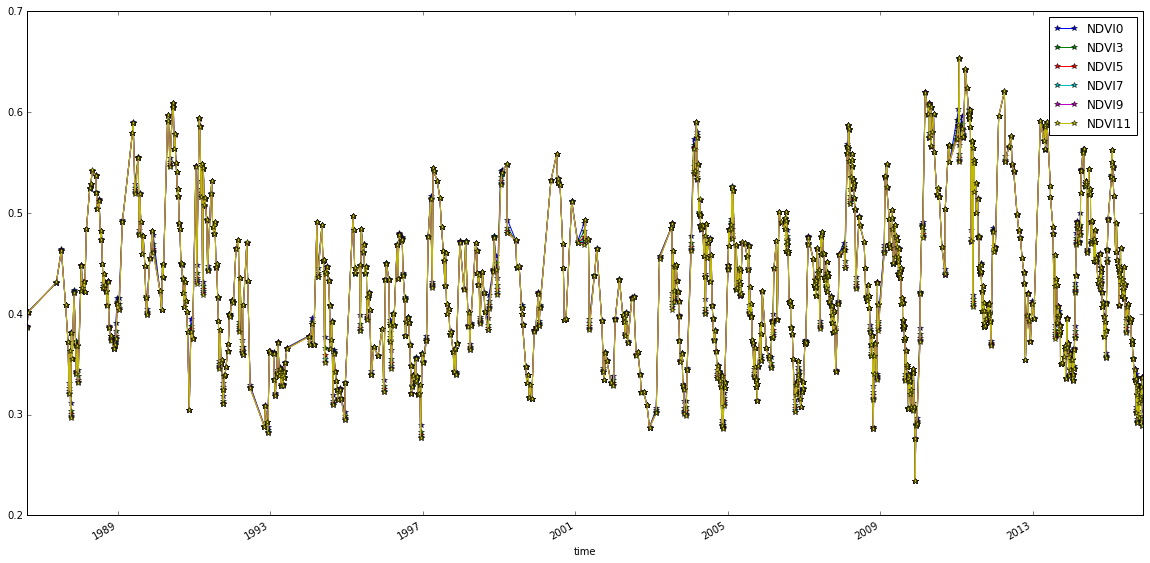

In [5]:
pdf.plot(marker='*', figsize=(20,10))

In [6]:
pdf.describe()

,NDVI0,NDVI3,NDVI5,NDVI7,NDVI9,NDVI11
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,0.430836,0.429843,0.429341,0.429097,0.428955,0.428875
std,0.076335,0.076395,0.076568,0.076701,0.076793,0.076859
min,0.234330,0.234375,0.234368,0.234326,0.234271,0.234209
25%,0.372418,0.371235,0.370810,0.370576,0.370456,0.370273
50%,0.426326,0.426144,0.425354,0.425249,0.425024,0.424659
75%,0.479724,0.476883,0.476420,0.476466,0.476618,0.476701
max,0.652566,0.652933,0.653376,0.653634,0.653742,0.653779


In [7]:
pdf.quantile(0.20)

NDVI0     0.360846
NDVI3     0.358966
NDVI5     0.358719
NDVI7     0.358274
NDVI9     0.358087
NDVI11    0.358000
dtype: float64

In [8]:
#pdf.hist(bins=50,sharex=True,figsize=(12,12),layout=(6,1))

In [9]:
q20= pdf.quantile(0.20)
type(q20)


# bot_tenperc=ndvi578[(ndvi578['NDVI'] <= p10[0])].dropna()
# top_tenperc=ndvi578[(ndvi578['NDVI'] >= p90[0])].dropna()

pandas.core.series.Series

In [10]:
colnames = q20.index

In [11]:
colnames


Index([u'NDVI0', u'NDVI3', u'NDVI5', u'NDVI7', u'NDVI9', u'NDVI11'], dtype='object')

0.360846010202
original NDVI result
(174, 7)
----------------------
0.358965683059
Comapre 1 with Orginal NDVI
(174, 7)
set([numpy.datetime64('1996-03-08T00:00:00.000000000')])
set([numpy.datetime64('2002-08-08T00:00:00.000000000')])
----------------------
0.358718811095
Comapre 2 with Orginal NDVI
(174, 7)
set([numpy.datetime64('1996-03-08T00:00:00.000000000')])
set([numpy.datetime64('2002-08-08T00:00:00.000000000')])
----------------------
0.35827381119
Comapre 3 with Orginal NDVI
(174, 7)
set([numpy.datetime64('1996-03-08T00:00:00.000000000'), numpy.datetime64('1994-06-07T00:00:00.000000000'), numpy.datetime64('2008-10-02T00:00:00.000000000')])
set([numpy.datetime64('1995-11-01T00:00:00.000000000'), numpy.datetime64('2002-08-08T00:00:00.000000000'), numpy.datetime64('2008-11-03T00:00:00.000000000')])
----------------------
0.358086757929
Comapre 4 with Orginal NDVI
(174, 7)
set([numpy.datetime64('1996-03-08T00:00:00.000000000'), numpy.datetime64('1994-06-07T00:00:00.000000000'), num

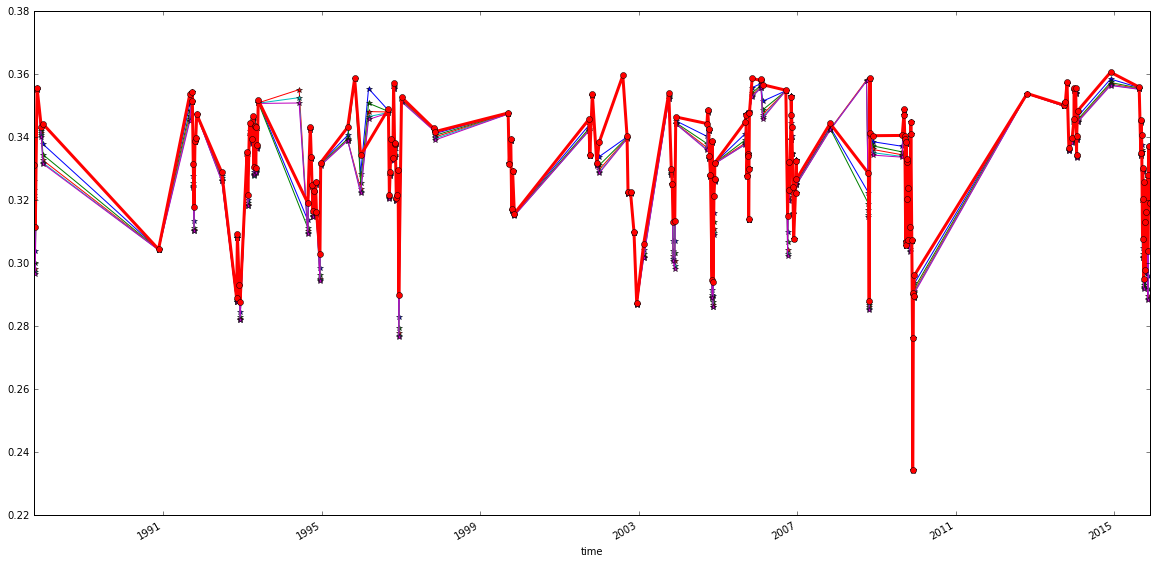

In [12]:
bot20ref=pdf[pdf[colnames[0]]<=q20[colnames[0]]] #None

setref= set(bot20ref.index.values)

fig =  plt.figure(figsize=(20,10))

#bot20ref[colnames[0]].plot(marker='o',figsize=(20,10))


for i in xrange(0, len(colnames)): #except the last column
    
    col=colnames[i]
    print(q20[col])

    bot20=pdf[pdf[col]<=q20[col]]
    
    if i==0:
        bot20ref=bot20
        print("original NDVI result")
        print(bot20.shape)
        #print(bot20.index.values)
        
    else:
        print("Comapre %s with Orginal NDVI" % str(i))
        print(bot20.shape)
        
        setinv=set(bot20.index.values)
        #print(bot20.index.values)
        #comapre sorted: 
        #print(bot20.index.sort_values() == bot20ref.index.sort_values())
        
        dset=setinv - setref
        print (dset)
        
        print(setref - setinv)
        
        bot20[col].plot(marker='*') #, sharex=ax)
    
    print("----------------------")
    
bot20ref[colnames[0]].plot(marker='o', color="red",  linewidth=3, linestyle="-")

In [13]:
bot20ref[bot20ref['PROD_TYPE']=='ls8_nbar_albers']

,NDVI0,NDVI3,NDVI5,NDVI7,NDVI9,NDVI11,PROD_TYPE
time,,,,,,,
2013-10-24,0.357500,0.357366,0.357185,0.357070,0.356985,0.356899,ls8_nbar_albers
2013-12-11,0.339951,0.339428,0.338994,0.338654,0.338417,0.338238,ls8_nbar_albers
2013-12-27,0.345738,0.345425,0.344996,0.344603,0.344299,0.344055,ls8_nbar_albers
2014-01-12,0.355597,0.354703,0.354104,0.353871,0.353879,0.354039,ls8_nbar_albers
2014-01-21,0.340325,0.340155,0.339828,0.339534,0.339297,0.339119,ls8_nbar_albers
2015-08-20,0.355976,0.355815,0.355635,0.355478,0.355343,0.355258,ls8_nbar_albers
2015-09-05,0.345488,0.345343,0.345110,0.344911,0.344742,0.344608,ls8_nbar_albers
2015-09-12,0.340723,0.337709,0.336114,0.335411,0.335259,0.335402,ls8_nbar_albers
2015-09-21,0.330332,0.330092,0.329752,0.329469,0.329256,0.329067,ls8_nbar_albers
